In [2]:
import matplotlib as plt
import os
import json
import pandas as pd

In [4]:

rep="GHz.json"
l=dict()

for file in os.listdir():
    if ".json" in file and "+" not in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["simSeconds"]

df = pd.DataFrame(
    [{"clock frequency in GHz": float(freq), "simSeconds": sim} for (freq,sim)  in l.items()])

df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

df = df.reset_index(drop=True)

df

,clock frequency in GHz,simSeconds
0,0.6,0.388892
1,0.8,0.291611
2,1.0,0.233288
3,1.2,0.194329
4,1.4,0.166568
5,1.6,0.145805
6,1.8,0.129708
7,2.0,0.116644
8,2.2,0.106146
9,2.4,0.097281


<AxesSubplot:title={'center':'No of seconds simulated vs clock frequency'}, xlabel='clock frequency in GHz'>

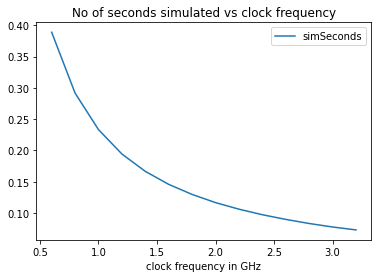

In [5]:
df.plot(x='clock frequency in GHz', y='simSeconds',title = 'No of seconds simulated vs clock frequency')

In [19]:
rep=".json"
l=dict()

for file in os.listdir():
    if "1GHz+Timing.json" in file or "1GHz+Timing+NoCache.json" in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["simSeconds"]

df = pd.DataFrame(
    [{"Configuration": (freq), "simSeconds": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,Configuration,simSeconds
0,1GHz+Timing+NoCache,9.790468
1,1GHz+Timing,0.226030


<AxesSubplot:title={'center':'simSeconds vs configuration'}, xlabel='Configuration'>

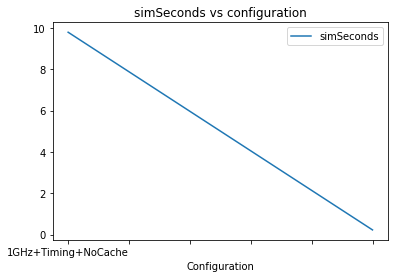

In [20]:
df.plot(x='Configuration', y='simSeconds',title = 'simSeconds vs configuration')

In [22]:
rep=".json"
l=dict()

for file in os.listdir():
    if "1GHz+Atomic+DDR3.json" in file or "1GHz+Atomic+DDR4.json" in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["hostInstRate "]

df = pd.DataFrame(
    [{"Configuration": (freq), "hostInstRate": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,Configuration,hostInstRate
0,1GHz+Atomic+DDR3,1103946.0
1,1GHz+Atomic+DDR4,1154578.0


In [15]:
rep=".json"
l=dict()

for file in os.listdir():
    if ".json" in file and "+" in file:
        key=file.replace(rep,"")
        key=key.replace("3.2GHz+","")
        f=open(file)
        data=json.load(f)
        ex_time=data["simInsts"]*data["board.processor.cores.core.cpi"]/(data["clk_freq"]*10**9)
        l[key]=ex_time

df = pd.DataFrame(
    [{"CPU Type": (freq), "Execution Time in s": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,CPU Type,Execution Time in s
0,Atomic,0.072903
1,Minor,2.323170
2,O3,0.801723
3,Timing,8.313445


<AxesSubplot:title={'center':'Execution Time vs CPU Type'}, xlabel='CPU Type'>

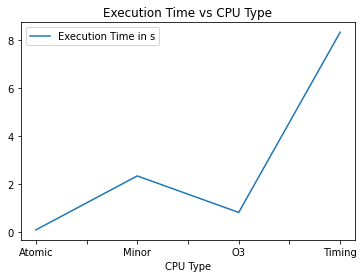

In [16]:
df.plot(x='CPU Type', y='Execution Time in s',title = 'Execution Time vs CPU Type')

In [14]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file and "320" in file:
        f=open(file)
        data=json.load(f)
        key=data["l1"]/data["l2"]
        l[key]=data["simSeconds"]

df = pd.DataFrame(
    [{"L1/L2 size ratio": (freq), "simSeconds": sim} for (freq,sim)  in l.items()])

df=df.sort_values(by=['L1/L2 size ratio'],ascending=True)

df = df.reset_index(drop=True)

df

,L1/L2 size ratio,simSeconds
0,0.16,0.400774
1,0.32,0.400774
2,1.25,0.400846


<AxesSubplot:title={'center':'Simulation Time vs l1/l2 size ratio'}, xlabel='L1/L2 size ratio'>

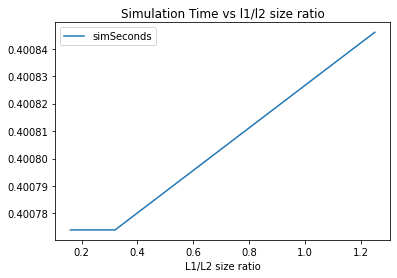

In [15]:
df.plot(x='L1/L2 size ratio', y='simSeconds',title = 'Simulation Time vs l1/l2 size ratio')

In [8]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file and "80" in file and "256" in file and ("4+" in file or "8+" in file):
        f=open(file)
        data=json.load(f)
        key=data["latency"]
        l[key]=data["hostInstRate "]

df = pd.DataFrame(
    [{"latency": float(freq), "hostInstRate ": sim} for (freq,sim)  in l.items()])

df=df.sort_values(by=["latency"],ascending=True)

df = df.reset_index(drop=True)

df

,latency,hostInstRate
0,4.0,652526.0
1,8.0,601345.0


<AxesSubplot:title={'center':'HostInstRate vs latency'}, xlabel='latency'>

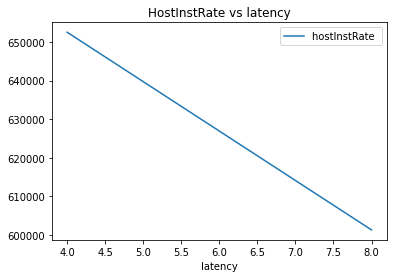

In [7]:
df.plot(x='latency', y='hostInstRate ',title = 'HostInstRate vs latency')

In [14]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file and "80" in file and "256" in file and ("2+" in file) and "10+2" not in file and "2+6" not in file:
        f=open(file)
        data=json.load(f)
        key=data["assoc"]
        l[key]=data["hostInstRate "]

df = pd.DataFrame(
    [{"assoc": float(freq), "hostInstRate ": sim} for (freq,sim)  in l.items()])

df=df.sort_values(by=["assoc"],ascending=True)

df = df.reset_index(drop=True)

df

,assoc,hostInstRate
0,2.0,601345.0
1,4.0,688392.0
2,8.0,561770.0


<AxesSubplot:title={'center':'HostInstRate vs assoc'}, xlabel='assoc'>

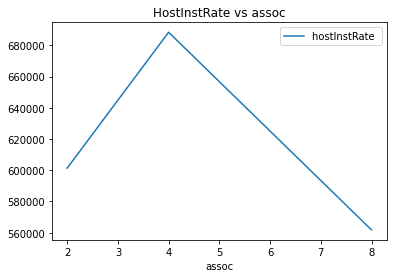

In [15]:
df.plot(x='assoc', y='hostInstRate ',title = 'HostInstRate vs assoc')

In [9]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file:
        f=open(file)
        data=json.load(f)
        key=data["bp"]
        if key == "MultiperspectivePerceptron64KB":
            key="MPP"
        elif key == "MultiperspectivePerceptronTAGE64KB":
            key="MPPTAGE"
        ex_time=data["simInsts"]*data["board.processor.cores.core.cpi"]/(data["clk_freq"]*10**9)

        val=[data["simSeconds"], ex_time, data['predictedTakenIncorrect'], data['branchMispredicts']]

        l[key]=val

df = pd.DataFrame(
    [{"Branch Prediction Scheme": bp, "simSeconds": sim[0], "CPU Execution Time":sim[1], "predictedTakenIncorrect":sim[2]
      , "branchMispredicts": sim[3] } for (bp,sim)  in l.items()])

df

,Branch Prediction Scheme,simSeconds,CPU Execution Time,predictedTakenIncorrect,branchMispredicts
0,BiModeBP,0.089339,0.089339,132990.0,552718.0
1,LocalBP,0.094937,0.094937,222453.0,929122.0
2,LTAGE,0.086869,0.086869,31861.0,281656.0
3,MPP,0.112481,0.112481,328900.0,2670883.0
4,MPPTAGE,0.085138,0.085138,44418.0,179781.0
5,TAGE,0.087320,0.087320,45597.0,308089.0
6,TournamentBP,0.088780,0.088780,125979.0,457630.0


c:\Users\anannya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


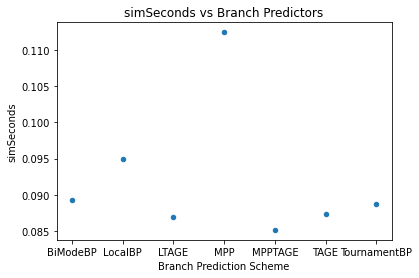

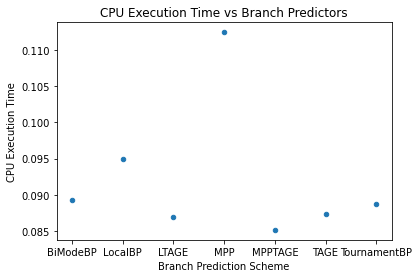

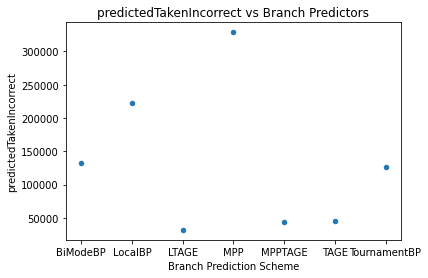

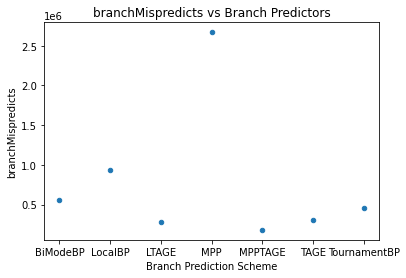

In [10]:
for col in list(df.columns.values)[1:]:
    df.plot.scatter(x='Branch Prediction Scheme', y=col,title = f"{col} vs Branch Predictors")

In [3]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file and "TimingSimpleCPU" in file:
        f=open(file)
        data=json.load(f)
        key=data["bp"]
        if key == "MultiperspectivePerceptron64KB":
            key="MPP"
        elif key == "MultiperspectivePerceptronTAGE64KB":
            key="MPPTAGE"
        ex_time=data["simInsts"]*data["board.processor.cores.core.cpi"]/(data["clk_freq"]*10**9)

        val=[data["simSeconds"], ex_time, data['BTBHitRatio']]

        l[key]=val

df = pd.DataFrame(
    [{"Branch Prediction Scheme": bp, "simSeconds": sim[0], "CPU Execution Time":sim[1], "BTBHitRatio":sim[2] } for (bp,sim)  in l.items()])

df

,Branch Prediction Scheme,simSeconds,CPU Execution Time,BTBHitRatio
0,BiModeBP,0.421254,0.421254,0.986120
1,LocalBP,0.421254,0.421254,0.956159
2,LTAGE,0.421254,0.421254,0.986151
3,MPP,0.421254,0.421254,0.986021
4,MPPTAGE,0.421254,0.421254,0.993249
5,TAGE,0.421254,0.421254,0.986145
6,TournamentBP,0.421254,0.421254,0.986181


c:\Users\anannya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Branch Target Buffer Hit Ratio vs Branch Predictors'}, xlabel='Branch Prediction Scheme', ylabel='BTBHitRatio'>

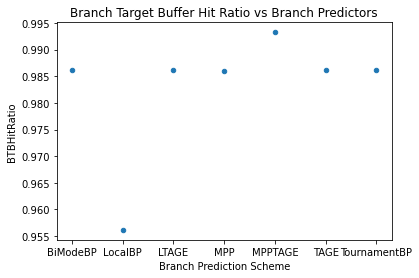

In [6]:
df.plot.scatter(x='Branch Prediction Scheme', y="BTBHitRatio",title = "Branch Target Buffer Hit Ratio vs Branch Predictors")

In [7]:
rep=".json"
l=dict()

for file in os.listdir():
    if rep in file and "AtomicSimpleCPU" in file:
        f=open(file)
        data=json.load(f)
        key=data["bp"]
        if key == "MultiperspectivePerceptron64KB":
            key="MPP"
        elif key == "MultiperspectivePerceptronTAGE64KB":
            key="MPPTAGE"
        ex_time=data["simInsts"]*data["board.processor.cores.core.cpi"]/(data["clk_freq"]*10**9)

        val=[data["simSeconds"], ex_time, data['BTBHitRatio']]

        l[key]=val

df = pd.DataFrame(
    [{"Branch Prediction Scheme": bp, "simSeconds": sim[0], "CPU Execution Time":sim[1], "BTBHitRatio":sim[2] } for (bp,sim)  in l.items()])

df

,Branch Prediction Scheme,simSeconds,CPU Execution Time,BTBHitRatio
0,BiModeBP,0.233288,0.233288,0.986120
1,LocalBP,0.233288,0.233288,0.956159
2,LTAGE,0.233288,0.233288,0.986151
3,MPP,0.233288,0.233288,0.986021
4,MPPTAGE,0.233288,0.233288,0.993249
5,TAGE,0.233288,0.233288,0.986145
6,TournamentBP,0.233288,0.233288,0.986181


c:\Users\anannya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Branch Target Buffer Hit Ratio vs Branch Predictors'}, xlabel='Branch Prediction Scheme', ylabel='BTBHitRatio'>

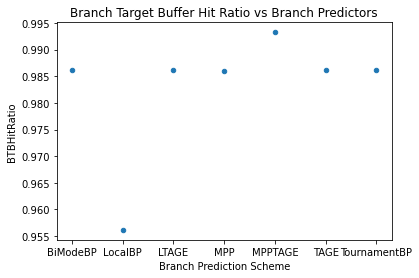

In [8]:
df.plot.scatter(x='Branch Prediction Scheme', y="BTBHitRatio",title = "Branch Target Buffer Hit Ratio vs Branch Predictors")